In [1]:
import os
import pickle
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
from typing import List, Union

In [2]:
data_path = "../data/04_cricket_1999to2011.csv"

In [3]:
def get_data(data_path) -> Union[pd.DataFrame, np.ndarray]:
    """
    Loads the data from the given path and returns a pandas dataframe.

    Args:
        path (str): Path to the data file.

    Returns:
        pd.DataFrame, np.ndarray: Data Structure containing the loaded data
        
    """
    try:
        data = pd.read_csv(data_path)
        return data
    except FileNotFoundError:
        print(f"File not found at '{data_path}'. Please provide the correct path.")
        return None
    
    

In [4]:
data = get_data(data_path)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126768 entries, 0 to 126767
Data columns (total 38 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Match                      126768 non-null  int64  
 1   Date                       126768 non-null  object 
 2   Innings                    126768 non-null  int64  
 3   Over                       126768 non-null  int64  
 4   Runs                       126768 non-null  int64  
 5   Total.Runs                 126768 non-null  int64  
 6   Innings.Total.Runs         126768 non-null  int64  
 7   Runs.Remaining             126768 non-null  int64  
 8   Total.Out                  126768 non-null  int64  
 9   Innings.Total.Out          126768 non-null  int64  
 10  Outs.Remaining             126768 non-null  int64  
 11  Wickets.in.Hand            126768 non-null  int64  
 12  Run.Rate                   126768 non-null  float64
 13  Innings.Run.Rate           12

In [5]:
print(f"Are there any Null Values in dataset? ---- {data.isnull().values.any()}")
print(f"Total null values in dataset? ---- {data.isnull().sum().sum()}")

Are there any Null Values in dataset? ---- True
Total null values in dataset? ---- 1109


In [6]:
column_names = list(data.columns.values)
column_names

['Match',
 'Date',
 'Innings',
 'Over',
 'Runs',
 'Total.Runs',
 'Innings.Total.Runs',
 'Runs.Remaining',
 'Total.Out',
 'Innings.Total.Out',
 'Outs.Remaining',
 'Wickets.in.Hand',
 'Run.Rate',
 'Innings.Run.Rate',
 'Run.Rate.Required',
 'Initial.Run.Rate.Required',
 'Target.Score',
 'Day-night',
 'At.Bat',
 'Fielding',
 'Home.Team',
 'Away.Team',
 'Stadium',
 'Country',
 'Total.Overs',
 'Winning.Team',
 'Toss.Winner',
 'at.bat.wins',
 'at.bat.won.toss',
 'at.bat.at.home',
 'at.bat.bat.first',
 'chose_bat_1st',
 'chose_bat_2nd',
 'forced_bat_1st',
 'forced_bat_2nd',
 'new.game',
 'Error.In.Data',
 'common.support']

In [7]:
data['Error.In.Data'].isnull().values.any()

False

In [8]:
def check_null_values(dataset):
    df = pd.DataFrame(dataset)
    null_info = {}

    for column in df.columns:
        null_count = df[column].isnull().sum()
        null_info[column] = null_count

    return null_info

import matplotlib.pyplot as plt

def dict_plot(null_info):
    mylist = [key for key, val in null_info.items() for _ in range(val)]
    plt.hist(mylist, bins=20)
    plt.show()


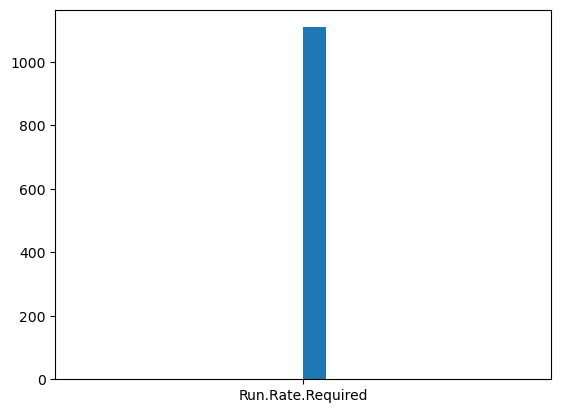

Only Required-Run-Rate has NaN Values


In [9]:
null_info = check_null_values(data)
dict_plot(null_info)
print(f"Only Required-Run-Rate has NaN Values")

In [10]:
#data = data.dropna()

In [11]:
def null_details(data: Union[pd.DataFrame, np.ndarray]):
    print(f"Are there any Null Values in dataset? ---- {data.isnull().values.any()}")
    print(f"Total null values in dataset? ---- {data.isnull().sum().sum()}")
    print(f"The size of our dataset is {len(data)}")
    print(f"The size of our dataset is {len(data.columns)}")

In [12]:
def null_details(data: Union[pd.DataFrame, np.ndarray]):
    print(f"Are there any Null Values in dataset? ---- {data.isnull().values.any()}")
    print(f"Total null values in dataset? ---- {data.isnull().sum().sum()}")
    print(f"The size of our dataset is {len(data)}")
    print(f"The size of our dataset is {len(data.columns)}")
    
def modify_date_format(dataset):
    df = pd.DataFrame(dataset)
    df['Date'] = pd.to_datetime(df['Date'], dayfirst=True).dt.strftime('%d-%m-%Y')
    return df

def select_columns(data: Union[pd.DataFrame, np.ndarray], columns_to_keep):
    if isinstance(data, np.ndarray):
        data = pd.DataFrame(data)

    data = data[columns_to_keep]

    return data

def preprocess_data(data: Union[pd.DataFrame, np.ndarray]) -> Union[pd.DataFrame, np.ndarray]:
    """Preprocesses the dataframe by
    (i)   removing the unnecessary columns,
    (ii)  loading date in proper format DD-MM-YYYY,
    (iii) removing the rows with missing values,
    (iv)  anything else you feel is required for training your model.

    Args:
        data (pd.DataFrame, nd.ndarray): Pandas dataframe containing the loaded data

    Returns:
        pd.DataFrame, np.ndarray: Datastructure containing the cleaned data.
    """
    columns_to_keep = ['Innings', 'Innings.Total.Runs', 'Total.Overs', 'Wickets.in.Hand', 'Over', 'Total.Runs']
    
    print("Details before Preprocessing")
    print("-"*40)
    null_details(data)
    data = data.dropna()
    data = select_columns(data, columns_to_keep)
    print("Details After Preprocessing")
    print("-"*40)
    null_details(data)
    
    return data

In [13]:
data = preprocess_data(data)

Details before Preprocessing
----------------------------------------
Are there any Null Values in dataset? ---- True
Total null values in dataset? ---- 1109
The size of our dataset is 126768
The size of our dataset is 38
Details After Preprocessing
----------------------------------------
Are there any Null Values in dataset? ---- False
Total null values in dataset? ---- 0
The size of our dataset is 125659
The size of our dataset is 6


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125659 entries, 0 to 126767
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype
---  ------              --------------   -----
 0   Innings             125659 non-null  int64
 1   Innings.Total.Runs  125659 non-null  int64
 2   Total.Overs         125659 non-null  int64
 3   Wickets.in.Hand     125659 non-null  int64
 4   Over                125659 non-null  int64
 5   Total.Runs          125659 non-null  int64
dtypes: int64(6)
memory usage: 6.7 MB
